# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Hadar 2017
# student 2: Liel 7732
# student 3: Noa 5900

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# reading first 5 lines of the test data set.
df_test = pd.read_csv('./wine_test.csv')
df_train = pd.read_csv('./wine_train.csv')
df_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,2
1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035,0
2,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725,2
3,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,1
4,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2


In [5]:
# 2 tables data presentation:
# pearson coefficient:
df_train.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


In [7]:
# crosstabulation
pd.crosstab(df_train['alcalinity_of_ash'], df_train['target'])

target,0,1,2
alcalinity_of_ash,,,
10.6,0,1,0
11.2,1,0,0
11.4,1,0,0
12.0,1,0,0
12.4,1,0,0
13.2,1,0,0
14.0,1,0,0
14.6,1,0,0
15.0,1,1,0


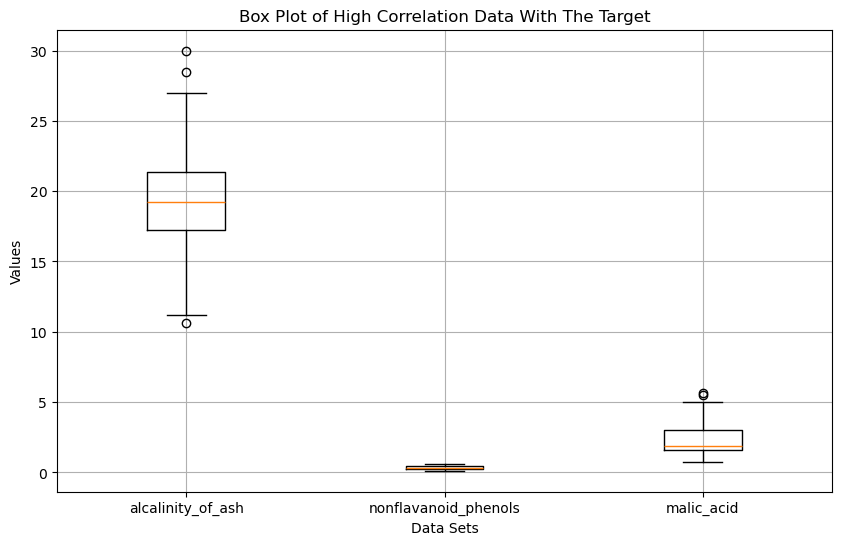

In [9]:
# 2 visualizations:
# boxplot
target_features = ['alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid']
plt.figure(figsize=(10, 6))
plt.boxplot([df_train[feature] for feature in target_features])
plt.title('Box Plot of High Correlation Data With The Target')
plt.xlabel('Data Sets')
plt.ylabel('Values')
plt.xticks([1,2,3],target_features)
plt.grid(True)
plt.show()

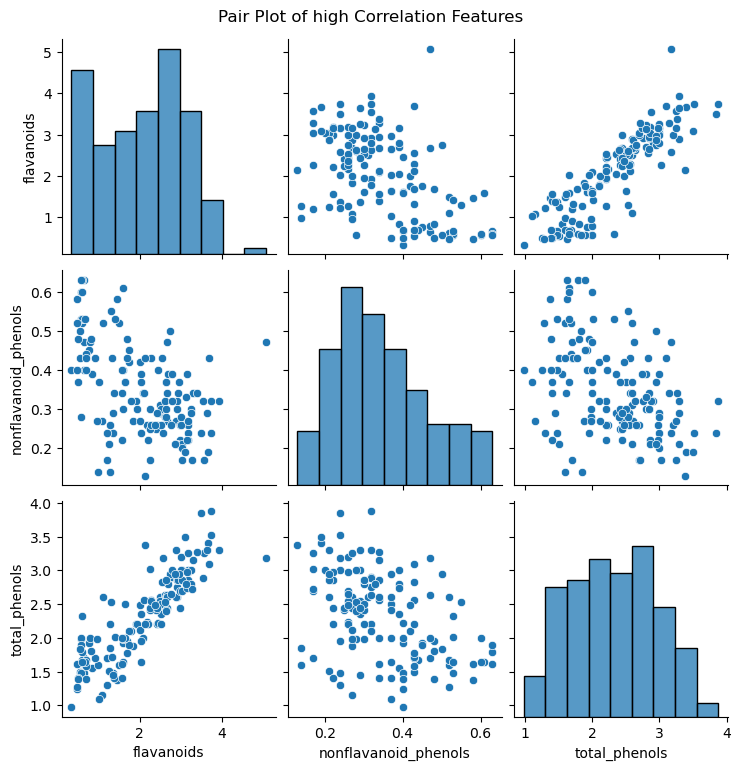

In [11]:
# pair plot
target_features = ['flavanoids', 'nonflavanoid_phenols', 'total_phenols',]
sns.pairplot(df_train[target_features])
plt.suptitle('Pair Plot of high Correlation Features', y=1.02)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [13]:
####1
# running PCA, standart scaling, keeping the highest correlated feature with target, reduce dimenstions.
# Algorithm: KNN, testing hyperparameters: n_neighbors: [1,3,5], distance: [1:manhattan, 2:euclid]
def knn_pca_reduce_dimensions(n_neighbors, distance):
    target_train = df_train['target']  # Replace 'target' with the actual column name of your target variable
    features_train = df_train.drop(columns=['target'])

    # Scale the data
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=7)
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for KNN
    X_train = final_train_df[['PC1']]
    y_train = final_train_df['target']

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=distance)

    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5).round(4)
    
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Mean Cross-Validation Accuracy: {cv_scores.mean().round(4)}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std().round(4)}')
    print('\n\n***********************************************************************\n\n')
    return cv_scores.mean()


cv_score_mean_dict = {"k=5, dist=manhattan": knn_pca_reduce_dimensions(5, 1),
                      "k=5, dist=euclid":knn_pca_reduce_dimensions(5, 2),
                      "k=3, dist=manhattan":knn_pca_reduce_dimensions(3, 1),
                      "k=3, dist=euclid":knn_pca_reduce_dimensions(3, 2), 
                      "k=1, dist=manhattan": knn_pca_reduce_dimensions(1, 1),
                      "k=1, dist=euclid": knn_pca_reduce_dimensions(1, 2)}
print(pd.Series(cv_score_mean_dict))
df_res = pd.Series(cv_score_mean_dict)
max_key = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value = cv_score_mean_dict[max_key]
print("\n\nFeature engeneering: PCA, removing dimentions, Standard Scaling \nAlgorithm: KNN \n\n")

print("** best result:",max_key, "**", "accuracy:", max_value.round(4))

Cross-Validation Accuracy Scores: [0.8966 0.6897 0.8571 0.9286 0.8929]
Mean Cross-Validation Accuracy: 0.853
Standard Deviation of Cross-Validation Accuracy: 0.0847


***********************************************************************


Cross-Validation Accuracy Scores: [0.8966 0.6897 0.8571 0.9286 0.8929]
Mean Cross-Validation Accuracy: 0.853
Standard Deviation of Cross-Validation Accuracy: 0.0847


***********************************************************************


Cross-Validation Accuracy Scores: [0.7931 0.6897 0.8214 0.9286 0.75  ]
Mean Cross-Validation Accuracy: 0.7966
Standard Deviation of Cross-Validation Accuracy: 0.0796


***********************************************************************


Cross-Validation Accuracy Scores: [0.7931 0.6897 0.8214 0.9286 0.75  ]
Mean Cross-Validation Accuracy: 0.7966
Standard Deviation of Cross-Validation Accuracy: 0.0796


***********************************************************************


Cross-Validation Accuracy Scores: 

In [15]:
###2
# running PCA, standart scaling, keeping of the PCA dimensions.
# Algorithm: KNN, testing hyperparameters: n_neighbors: [1,3,5], distance: [1:manhattan, 2:euclid]

def knn_pca_keep_dimensions(n_neighbors, distance):
    target_train = df_train['target']  # Replace 'target' with the actual column name of your target variable
    features_train = df_train.drop(columns=['target'])

    # Scale the data
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=7)
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for KNN
    X_train = final_train_df.drop(columns=['target'])
    y_train = final_train_df['target']

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=distance)

    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5).round(4)

    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Mean Cross-Validation Accuracy: {cv_scores.mean().round(4)}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std().round(4)}')
    print('\n\n***********************************************************************\n\n')

    return cv_scores.mean()

cv_score_mean_dict = {"k=5, dist=manhattan": knn_pca_keep_dimensions(5, 1),
                      "k=5, dist=euclid":knn_pca_keep_dimensions(5, 2),
                      "k=3, dist=manhattan":knn_pca_keep_dimensions(3, 1),
                      "k=3, dist=euclid":knn_pca_keep_dimensions(3, 2), 
                      "k=1, dist=manhattan": knn_pca_keep_dimensions(1, 1),
                      "k=1, dist=euclid": knn_pca_keep_dimensions(1, 2)}
print(pd.Series(cv_score_mean_dict))
df_res = pd.Series(cv_score_mean_dict)
max_key = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value = cv_score_mean_dict[max_key]
print("\n\nFeature engeneering: PCA, keeping all dimentions, Standard Scaling \nAlgorithm: KNN \n\n")
print("** best result:",max_key, "**", "accuracy:", max_value.round(4))

Cross-Validation Accuracy Scores: [1.     0.931  1.     0.9286 1.    ]
Mean Cross-Validation Accuracy: 0.9719
Standard Deviation of Cross-Validation Accuracy: 0.0344


***********************************************************************


Cross-Validation Accuracy Scores: [1.     0.931  1.     0.9286 1.    ]
Mean Cross-Validation Accuracy: 0.9719
Standard Deviation of Cross-Validation Accuracy: 0.0344


***********************************************************************


Cross-Validation Accuracy Scores: [1.     0.931  1.     0.9286 0.9286]
Mean Cross-Validation Accuracy: 0.9576
Standard Deviation of Cross-Validation Accuracy: 0.0346


***********************************************************************


Cross-Validation Accuracy Scores: [0.9655 0.931  1.     0.9286 0.9643]
Mean Cross-Validation Accuracy: 0.9579
Standard Deviation of Cross-Validation Accuracy: 0.0263


***********************************************************************


Cross-Validation Accuracy Scores

In [19]:
###3
# MinMax scaling, removing features that highly correlated with other features (more than 75% correlation).
# Algorithm: KNN, testing hyperparameters: n_neighbors: [1,3,5], distance: [1:manhattan, 2:euclid]

def knn_minmax_reduce_correlation(n_neighbors, distance, df_train, target_column='target', correlation_threshold=0.75):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])


    # Apply MinMax Scaling
    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Convert to DataFrame to handle correlation
    scaled_train_df = pd.DataFrame(scaled_train_data, columns=features_train.columns)

    # Reduce highly correlated features
    corr_matrix = scaled_train_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    reduced_train_df = scaled_train_df.drop(columns=to_drop)

    print(f'Dropped columns due to high correlation: {to_drop}')

    # Prepare data for KNN
    X_train = reduced_train_df
    y_train = target_train

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=distance)

    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores_rounded = np.round(cv_scores, 4)

    print(f'Cross-Validation Accuracy Scores: {cv_scores_rounded}')
    print(f'Mean Cross-Validation Accuracy: {np.round(cv_scores_rounded.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {np.round(cv_scores_rounded.std(), 4)}')
    print('\n\n***********************************************************************\n\n')

    return np.round(cv_scores_rounded.mean(), 4)

# Example usage
cv_score_mean_dict = {
    "k=5, dist=manhattan": knn_minmax_reduce_correlation(5, 1, df_train),
    "k=5, dist=euclid": knn_minmax_reduce_correlation(5, 2, df_train),
    "k=3, dist=manhattan": knn_minmax_reduce_correlation(3, 1, df_train),
    "k=3, dist=euclid": knn_minmax_reduce_correlation(3, 2, df_train),
    "k=1, dist=manhattan": knn_minmax_reduce_correlation(1, 1, df_train),
    "k=1, dist=euclid": knn_minmax_reduce_correlation(1, 2, df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value = cv_score_mean_dict[max_key]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: MinMax Scaling, reducing highly correlated features \nAlgorithm: KNN \n\n")
print("** Best result:", max_key, "**", "accuracy:", max_value.round(4))

Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation Accuracy Scores: [1.     0.8621 0.9643 0.9286 0.9643]
Mean Cross-Validation Accuracy: 0.9439
Standard Deviation of Cross-Validation Accuracy: 0.0467


***********************************************************************


Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation Accuracy Scores: [1.     0.8966 1.     0.9286 0.9643]
Mean Cross-Validation Accuracy: 0.9579
Standard Deviation of Cross-Validation Accuracy: 0.0405


***********************************************************************


Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation Accuracy Scores: [1.     0.8621 0.9643 0.9643 0.9643]
Mean Cross-Validation Accuracy: 0.951
Standard Deviation of Cross-Validation Accuracy: 0.0466


***********************************************************************


Dropped col

In [23]:
#####4
# Function to train and evaluate Decision Tree with MinMax scaling and correlation-based feature reduction
def decision_tree_minmax_reduce_correlation(max_depth, criterion, df_train, target_column='target', correlation_threshold=0.8):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Apply MinMax Scaling
    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Convert to DataFrame to handle correlation
    scaled_train_df = pd.DataFrame(scaled_train_data, columns=features_train.columns)

    # Reduce highly correlated features
    corr_matrix = scaled_train_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    reduced_train_df = scaled_train_df.drop(columns=to_drop)

    print(f'Dropped columns due to high correlation: {to_drop}')

    # Prepare data for Decision Tree
    X_train = reduced_train_df
    y_train = target_train
    
    # Train the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
    cv_scores_rounded = np.round(cv_scores, 4)

    print(f'Cross-Validation Accuracy Scores: {cv_scores_rounded}')
    print(f'Mean Cross-Validation Accuracy: {np.round(cv_scores_rounded.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {np.round(cv_scores_rounded.std(), 4)}')
    print('\n\n***********************************************************************\n\n')

    return np.round(cv_scores_rounded.mean(), 4)

# Example usage with both depth and criterion
cv_score_mean_dict = {
    "depth=5, criterion=gini": decision_tree_minmax_reduce_correlation(5, 'gini', df_train),
    "depth=10, criterion=gini": decision_tree_minmax_reduce_correlation(10, 'gini', df_train),
    "depth=15, criterion=gini": decision_tree_minmax_reduce_correlation(15, 'gini', df_train),
    "depth=20, criterion=gini": decision_tree_minmax_reduce_correlation(20, 'gini', df_train),
    "depth=None, criterion=gini": decision_tree_minmax_reduce_correlation(None, 'gini', df_train),
    "depth=5, criterion=entropy": decision_tree_minmax_reduce_correlation(5, 'entropy', df_train),
    "depth=10, criterion=entropy": decision_tree_minmax_reduce_correlation(10, 'entropy', df_train),
    "depth=15, criterion=entropy": decision_tree_minmax_reduce_correlation(15, 'entropy', df_train),
    "depth=20, criterion=entropy": decision_tree_minmax_reduce_correlation(20, 'entropy', df_train),
    "depth=None, criterion=entropy": decision_tree_minmax_reduce_correlation(None, 'entropy', df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value = cv_score_mean_dict[max_key]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: MinMax Scaling, reducing highly correlated features \nAlgorithm: Decision Tree \n\n")
print("** Best result:", max_key, "**", "accuracy:", max_value.round(4))

Dropped columns due to high correlation: ['flavanoids']
Cross-Validation Accuracy Scores: [0.9655 0.8276 0.8214 0.8929 0.9286]
Mean Cross-Validation Accuracy: 0.8872
Standard Deviation of Cross-Validation Accuracy: 0.0561


***********************************************************************


Dropped columns due to high correlation: ['flavanoids']
Cross-Validation Accuracy Scores: [0.931  0.8276 0.8571 0.8929 0.8929]
Mean Cross-Validation Accuracy: 0.8803
Standard Deviation of Cross-Validation Accuracy: 0.0352


***********************************************************************


Dropped columns due to high correlation: ['flavanoids']
Cross-Validation Accuracy Scores: [1.     0.8276 0.9286 0.8929 0.9643]
Mean Cross-Validation Accuracy: 0.9227
Standard Deviation of Cross-Validation Accuracy: 0.0595


***********************************************************************


Dropped columns due to high correlation: ['flavanoids']
Cross-Validation Accuracy Scores: [0.9655 0.8276 0

In [25]:
# This function trains and evaluates a Decision Tree classifier with Standard Scaling 
# and dimensionality reduction using PCA while reducing the 
# dimensions to only include "PC1" that has the highest correlation.
# The goal is to identify the best max_depth and criterion hyperparameters 
# for the Decision Tree model using 5-fold cross-validation.

# running PCA, standard scaling, keeping of the PCA dimensions.
# Algorithm: decision tree, testing hyperparameters: depths: [5,10,15,20,None], criteria: ['gini', 'entropy']
def decision_tree_pca_reduce_dimensions(depth, criterion, df_train, target_column='target'):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Apply Standard Scaling
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=1)  # Keep only the first principal component
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for Decision Tree
    X_train = final_train_df[['PC1']]
    y_train = final_train_df['target']

    # Train the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=depth, criterion=criterion)  # Use max_depth and criterion as parameters

    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
    cv_scores_rounded = np.round(cv_scores, 4)

    print(f'Cross-Validation Accuracy Scores: {cv_scores_rounded}')
    print(f'Mean Cross-Validation Accuracy: {np.round(cv_scores_rounded.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {np.round(cv_scores_rounded.std(), 4)}')
    print('\n\n***********************************************************************\n\n')

    return np.round(cv_scores_rounded.mean(), 4)

# Example usage
cv_score_mean_dict = {
    "depth=5, criterion=gini": decision_tree_pca_reduce_dimensions(5, 'gini', df_train),
    "depth=10, criterion=gini": decision_tree_pca_reduce_dimensions(10, 'gini', df_train),
    "depth=15, criterion=gini": decision_tree_pca_reduce_dimensions(15, 'gini', df_train),
    "depth=20, criterion=gini": decision_tree_pca_reduce_dimensions(20, 'gini', df_train),
    "depth=None, criterion=gini": decision_tree_pca_reduce_dimensions(None, 'gini', df_train),
    "depth=5, criterion=entropy": decision_tree_pca_reduce_dimensions(5, 'entropy', df_train),
    "depth=10, criterion=entropy": decision_tree_pca_reduce_dimensions(10, 'entropy', df_train),
    "depth=15, criterion=entropy": decision_tree_pca_reduce_dimensions(15, 'entropy', df_train),
    "depth=20, criterion=entropy": decision_tree_pca_reduce_dimensions(20, 'entropy', df_train),
    "depth=None, criterion=entropy": decision_tree_pca_reduce_dimensions(None, 'entropy', df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value = cv_score_mean_dict[max_key]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: Standard Scaling, PCA (keeping only PC1) \nAlgorithm: Decision Tree \n\n")
print("** Best result:", max_key, "**", "accuracy:", max_value.round(4))

Cross-Validation Accuracy Scores: [0.8966 0.6897 0.8214 0.9286 0.7857]
Mean Cross-Validation Accuracy: 0.8244
Standard Deviation of Cross-Validation Accuracy: 0.0845


***********************************************************************


Cross-Validation Accuracy Scores: [0.7931 0.6897 0.7857 0.8571 0.7857]
Mean Cross-Validation Accuracy: 0.7823
Standard Deviation of Cross-Validation Accuracy: 0.0535


***********************************************************************


Cross-Validation Accuracy Scores: [0.7931 0.6897 0.7857 0.8571 0.7857]
Mean Cross-Validation Accuracy: 0.7823
Standard Deviation of Cross-Validation Accuracy: 0.0535


***********************************************************************


Cross-Validation Accuracy Scores: [0.7931 0.6897 0.7857 0.8571 0.7857]
Mean Cross-Validation Accuracy: 0.7823
Standard Deviation of Cross-Validation Accuracy: 0.0535


***********************************************************************


Cross-Validation Accuracy Scores

In [27]:
# This function trains and evaluates a Decision Tree classifier with Standard Scaling 
# and dimensionality reduction using PCA while keeping all of the PCA result dimensions 
# The goal is to identify the best max_depth:[5,10,15,20,None] and criterion:['gini', 'entropy'] hyperparameters 
# for the Decision Tree model using 5-fold cross-validation.

def decision_tree_pca_keep_dimensions(depth, criterion, df_train, target_column='target'):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Apply Standard Scaling
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=7)  # Keep all principal components
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for Decision Tree
    X_train = final_train_df.drop(columns=['target'])
    y_train = final_train_df['target']

    # Train the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=depth, criterion=criterion)  # Use max_depth and criterion as parameters

    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
    cv_scores_rounded = np.round(cv_scores, 4)

    print(f'Cross-Validation Accuracy Scores: {cv_scores_rounded}')
    print(f'Mean Cross-Validation Accuracy: {np.round(cv_scores_rounded.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {np.round(cv_scores_rounded.std(), 4)}')
    print('\n\n***********************************************************************\n\n')

    return np.round(cv_scores_rounded.mean(), 4)

# Example usage
cv_score_mean_dict = {
    "depth=5, criterion=gini": decision_tree_pca_keep_dimensions(5, 'gini', df_train),
    "depth=10, criterion=gini": decision_tree_pca_keep_dimensions(10, 'gini', df_train),
    "depth=15, criterion=gini": decision_tree_pca_keep_dimensions(15, 'gini', df_train),
    "depth=20, criterion=gini": decision_tree_pca_keep_dimensions(20, 'gini', df_train),
    "depth=None, criterion=gini": decision_tree_pca_keep_dimensions(None, 'gini', df_train),
    "depth=5, criterion=entropy": decision_tree_pca_keep_dimensions(5, 'entropy', df_train),
    "depth=10, criterion=entropy": decision_tree_pca_keep_dimensions(10, 'entropy', df_train),
    "depth=15, criterion=entropy": decision_tree_pca_keep_dimensions(15, 'entropy', df_train),
    "depth=20, criterion=entropy": decision_tree_pca_keep_dimensions(20, 'entropy', df_train),
    "depth=None, criterion=entropy": decision_tree_pca_keep_dimensions(None, 'entropy', df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value = cv_score_mean_dict[max_key]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: Standard Scaling, PCA (keeping all dimensions) \nAlgorithm: Decision Tree \n\n")
print("** Best result:", max_key, "**", "accuracy:", max_value.round(4))

Cross-Validation Accuracy Scores: [1.     0.7931 1.     0.8929 1.    ]
Mean Cross-Validation Accuracy: 0.9372
Standard Deviation of Cross-Validation Accuracy: 0.0831


***********************************************************************


Cross-Validation Accuracy Scores: [1.     0.8276 1.     0.8929 1.    ]
Mean Cross-Validation Accuracy: 0.9441
Standard Deviation of Cross-Validation Accuracy: 0.0715


***********************************************************************


Cross-Validation Accuracy Scores: [0.9655 0.8276 1.     0.8929 1.    ]
Mean Cross-Validation Accuracy: 0.9372
Standard Deviation of Cross-Validation Accuracy: 0.0673


***********************************************************************


Cross-Validation Accuracy Scores: [1.     0.8276 1.     0.9286 1.    ]
Mean Cross-Validation Accuracy: 0.9512
Standard Deviation of Cross-Validation Accuracy: 0.0677


***********************************************************************


Cross-Validation Accuracy Scores

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation